# 패키지 다운로드

In [1]:
# train_original = pd.read_excel('/content/drive/MyDrive//07. 1차프로젝트/02. Train_Test Data/train.xlsx')
# print(train_original.shape)
# train_original.head()

In [1]:
25*60*60

90000

In [6]:
#import tensorflow as tf
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#import numpy as np
#import os
import pandas as pd
#import warnings

from statsmodels.stats.outliers_influence import variance_inflation_factor

np.set_printoptions(suppress=True)


# mpl.rcParams['figure.figsize'] = (8, 6)
# mpl.rcParams['axes.grid'] = False

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas'

In [2]:
!pip install tensorflow

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


# 데이터 셋 확인

In [3]:
# '선박번호', '날짜_시간', '날짜', '시간', '위도', '경도', '대지속력', '실침로', '선수미선','점사이_거리', '시간_차이', '정박지', '평균선회반경(m)', '유속', '유향', '우행', '풍향', '풍속', '최대파고', '유의파고', '평균파고', 'answer', '유행'

In [2]:
# 데이터 불러오기
busan = pd.read_csv("../data/Busan/busan_train_full3.csv", encoding="cp949")

NameError: name 'pd' is not defined

## 유향 전처리 다시하기

In [5]:
# '선박번호', '날짜_시간', '날짜', '시간', '위도', '경도', '대지속력', '실침로', '선수미선', '점사이_거리', '시간_차이', '정박지', '평균선회반경(m)', '유속', '유향', '우행', '풍향', '풍속', '최대파고', '유의파고', '평균파고', 'answer', '유행', 'Combined'

In [1]:
busan_test = busan[['선박번호', '날짜_시간', '정박지','평균선회반경(m)','유속', '유행', '풍향', '풍속', 'answer']]
busan_test = busan_test.dropna()
busan_test

NameError: name 'busan' is not defined

In [7]:
# 결측치 없는 데이터 정제 / datetime 변환
busan_test_full = busan_test.dropna().reset_index(drop = True)
busan_test_full["날짜_시간"] = pd.to_datetime(busan_test_full["날짜_시간"])

In [8]:
# 보간법
df = pd.DataFrame()

for i in busan_test_full["선박번호"].unique():
    temp = busan_test_full[busan_test_full["선박번호"] == i]

    temp = temp.set_index('날짜_시간')
    temp = temp.resample('1T').mean().interpolate()
    df = pd.concat([df, temp], axis = 0)
    
# 보간법으로 늘어난 answer의 값을 0, 1로 조정
df.loc[df['answer'] != 1, 'answer'] = 0
df= df.reset_index()
df

,날짜_시간,선박번호,정박지,평균선회반경(m),유속,유행,풍향,풍속,answer
0,2021-01-14 22:47:00,1.0,3.0,322.0,21.300000,98.000000,358.000000,1.200000,0.0
1,2021-01-14 22:48:00,1.0,3.0,322.0,21.233333,97.000000,300.333333,0.866667,0.0
2,2021-01-14 22:49:00,1.0,3.0,322.0,21.166667,96.000000,242.666667,0.533333,0.0
3,2021-01-14 22:50:00,1.0,3.0,322.0,21.100000,95.000000,185.000000,0.200000,0.0
4,2021-01-14 22:51:00,1.0,3.0,322.0,20.850000,94.500000,201.500000,0.183333,0.0
...,...,...,...,...,...,...,...,...,...
337702,2022-04-10 17:47:00,247.0,3.0,322.0,16.666667,73.000000,195.666667,9.333333,0.0
337703,2022-04-10 17:48:00,247.0,3.0,322.0,15.900000,73.000000,196.000000,9.400000,0.0
337704,2022-04-10 17:49:00,247.0,3.0,322.0,17.100000,74.666667,197.000000,9.033333,0.0
337705,2022-04-10 17:50:00,247.0,3.0,322.0,18.300000,76.333333,198.000000,8.666667,0.0


### 보간 & 더미 데이터

In [9]:
dummy = pd.get_dummies(df['정박지'])

dummy_busan = pd.concat([dummy, df[['선박번호', '유속', '유행', '풍향', '풍속', 'answer']]], axis = 1)

### 학습데이터 준비

In [10]:
busan_df = dummy_busan[['선박번호', "유속","유행","풍향","풍속",1,2,3,4,5,"answer"]]
busan_df

,선박번호,유속,유행,풍향,풍속,1.0,2.0,3.0,4.0,5.0,answer
0,1.0,21.300000,98.000000,358.000000,1.200000,0,0,1,0,0,0.0
1,1.0,21.233333,97.000000,300.333333,0.866667,0,0,1,0,0,0.0
2,1.0,21.166667,96.000000,242.666667,0.533333,0,0,1,0,0,0.0
3,1.0,21.100000,95.000000,185.000000,0.200000,0,0,1,0,0,0.0
4,1.0,20.850000,94.500000,201.500000,0.183333,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
337702,247.0,16.666667,73.000000,195.666667,9.333333,0,0,1,0,0,0.0
337703,247.0,15.900000,73.000000,196.000000,9.400000,0,0,1,0,0,0.0
337704,247.0,17.100000,74.666667,197.000000,9.033333,0,0,1,0,0,0.0
337705,247.0,18.300000,76.333333,198.000000,8.666667,0,0,1,0,0,0.0


In [11]:
busan = busan_df.values
dataset = busan[:, 1:5]
data_mean = dataset.mean(axis=0)
data_std = dataset.std(axis=0)
dataset = (dataset-data_mean)/data_std
    
remain = busan[:, (0,5,6,7,8,9)]
    
dataset = np.concatenate((np.reshape(remain[:, 0], (-1,1)), dataset), axis=1)
dataset = np.concatenate((dataset,remain[:, 1:]), axis=1)

study_length = 60
expect_period=  30

data = []
label = []
boat_num=np.unique(dataset [:,0])
np.random.shuffle(boat_num)

for j in boat_num:
    temp=dataset[dataset[:,0]==j]
    for i in range(len(temp) - study_length - expect_period):
        data.append(dataset[i:i+study_length, 1:-1])
        label.append(dataset[i+study_length+expect_period,-1])

# 데이터 표준화 및 분리
- 전체 데이터를 표준화

In [12]:
# study_length = 40
# expect_period=  30

# data = []
# label = []

# for j in busan_df["선박번호"].unique():
#     temp = busan_df[busan_df["선박번호"] == j].values
#     # 표준화
#     dataset = temp[:, 1:5]
#     data_mean = dataset.mean(axis=0)
#     data_std = dataset.std(axis=0)
#     dataset = (dataset-data_mean)/data_std
    
#     remain = temp[:,(5,6,7,8,9)]
    
#     dataset = np.concatenate((np.reshape(remain[:,0],(-1,1)),dataset), axis=1)
#     dataset = np.concatenate((dataset,remain[:,1:]), axis=1)
#     # 분리
#     for i in range(len(temp) - study_length - expect_period):
#         data.append(dataset[i:i+study_length,0:-1])
#         label.append(dataset[i+study_length+expect_period,-1])
        
        
# 학습 - 평가 데이터 분리
train_test_split = int(len(label)*0.8)
data_split = np.split(data, [train_test_split], axis=0)
label_split = np.split(label, [train_test_split], axis=0)

data_train = data_split[0]
data_test = data_split[1]

label_train = label_split[0]
label_test = label_split[1]


# 결과 확인
label_train = np.reshape(label_train,(-1,1))
label_test = np.reshape(label_test,(-1,1))
print(data_train.shape)  # (262245, 15, 9)
print(data_test.shape)  # (65562, 15, 9)

print(label_train.shape)  #(262245, )
print(label_test.shape)  #(65562, )

(254325, 60, 8)
(63582, 60, 8)
(254325, 1)
(63582, 1)


In [13]:
BUFFER_SIZE = 100
BATCH_SIZE = 88
# 모델 학습 시 사용할 데이터의 크기
# 데이터셋 크기의 10% ~ 20%

train_data = tf.data.Dataset.from_tensor_slices((data_train, label_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_data = tf.data.Dataset.from_tensor_slices((data_test, label_test))
val_data = val_data.batch(BATCH_SIZE)

# MLP

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, metrics

# Define the model
model = tf.keras.models.Sequential([
    
    layers.Flatten(input_shape=data_train.shape[-2:]),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# Train the model
history = model.fit(train_data,
                    epochs=20,
                    batch_size=BATCH_SIZE,
                    validation_data=val_data,
                    verbose=1)

# # Generate a single prediction
# sample = data_test[0]  # Example: Take the first sample from the test data
# sample = sample.reshape(1, *sample.shape)  # Reshape the sample to match the model input shape
# prediction = model.predict(sample)

# print(prediction)

Epoch 1/20
2891/2891 [==============================] - 7s 2ms/step - loss: 0.0439 - binary_accuracy: 0.9863 - val_loss: 0.0061 - val_binary_accuracy: 0.9982
Epoch 2/20
2891/2891 [==============================] - 6s 2ms/step - loss: 0.0094 - binary_accuracy: 0.9972 - val_loss: 0.0020 - val_binary_accuracy: 0.9997
Epoch 3/20
2891/2891 [==============================] - 6s 2ms/step - loss: 0.0059 - binary_accuracy: 0.9981 - val_loss: 6.6551e-04 - val_binary_accuracy: 1.0000
Epoch 4/20
2891/2891 [==============================] - 6s 2ms/step - loss: 0.0029 - binary_accuracy: 0.9987 - val_loss: 3.1601e-04 - val_binary_accuracy: 0.9999
Epoch 5/20
2891/2891 [==============================] - 6s 2ms/step - loss: 0.0016 - binary_accuracy: 0.9993 - val_loss: 1.6276e-04 - val_binary_accuracy: 0.9999
Epoch 6/20
2891/2891 [==============================] - 6s 2ms/step - loss: 0.0011 - binary_accuracy: 0.9996 - val_loss: 2.5360e-04 - val_binary_accuracy: 0.9999
Epoch 7/20
2891/2891 [==============

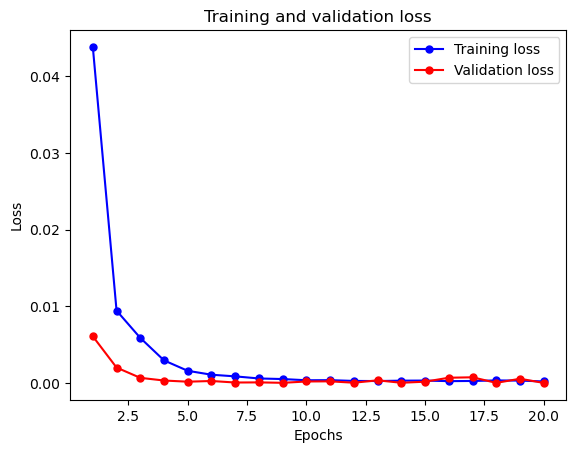

In [59]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-o', label='Training loss',markersize=5)  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'r-o', label='Validation loss',markersize=5) # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 모델 저장

In [106]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
predictions= np.round(model.predict(data_test)).flatten()
confusion = confusion_matrix(label_test, predictions)
print("Confusion Matrix:")
print(confusion)

# Generate classification report
classification = classification_report(label_test, predictions)
print("Classification Report:")
print(classification)

1987/1987 [==============================] - 3s 2ms/step
Confusion Matrix:
[[58468     0]
 [    0  5114]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58468
         1.0       1.00      1.00      1.00      5114

    accuracy                           1.00     63582
   macro avg       1.00      1.00      1.00     63582
weighted avg       1.00      1.00      1.00     63582



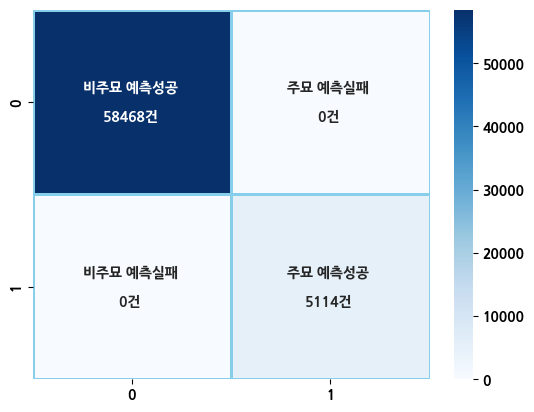

In [124]:
import seaborn as sns 
group_names = ['비주묘 예측성공','주묘 예측실패','비주묘 예측실패','주묘 예측성공']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f"{v1} \n\n{v2}건 " for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt="", cmap='Blues',linewidths=1, linecolor='skyblue')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] =10
plt.show()

In [125]:
print(f'CSI: {confusion[1][1]/(confusion[1][0]+confusion[1][1]+confusion[0][1]):.3f}')

CSI: 1.000


In [126]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
predictions= np.round(model.predict(data_train)).flatten()
confusion = confusion_matrix(label_train, predictions)
print("Confusion Matrix:")
print(confusion)

# Generate classification report
classification = classification_report(label_train, predictions)
print("Classification Report:")
print(classification)

7948/7948 [==============================] - 14s 2ms/step
Confusion Matrix:
[[223338      0]
 [     0  30987]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    223338
         1.0       1.00      1.00      1.00     30987

    accuracy                           1.00    254325
   macro avg       1.00      1.00      1.00    254325
weighted avg       1.00      1.00      1.00    254325



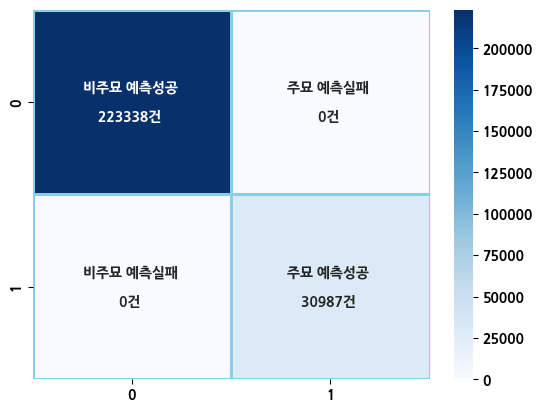

CSI: 1.000


In [127]:
import seaborn as sns 
group_names = ['비주묘 예측성공','주묘 예측실패','비주묘 예측실패','주묘 예측성공']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f"{v1} \n\n{v2}건 " for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt="", cmap='Blues',linewidths=1, linecolor='skyblue')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] =10
plt.show()

print(f'CSI: {confusion[1][1]/(confusion[1][0]+confusion[1][1]+confusion[0][1]):.3f}')

In [32]:
# 모델을 피클 파일로 저장합니다.
model.save('./MLP_Model.h5')


import pickle
filename = "./MLP_Model.pkl"
with open(filename, "wb") as f:
    pickle.dump(model, f)
    


# 저장된 피클 파일로부터 모델을 로드합니다.
# filename = "trained_model.pkl"
# with open(filename, "rb") as f:
#     loaded_model = pickle.load(f)

# # 로드된 모델을 사용하여 예측 등을 수행합니다.
# prediction = loaded_model.predict(input_data)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-06-08 16:23:31         2776
metadata.json                                  2023-06-08 16:23:31           64
variables.h5                                   2023-06-08 16:23:31        85872
